# 📖 Background
In the mystical land of **Arcadia**, where pixels and bits weave the fabric of reality, the ancient and revered **Valut of Classics** has begun to fade into obscurity. This vault, a legendary archive that houses the most iconic video games from 1980 to 2020, is threatened to be lost forever. Without intervention, the stories and legacies of these timeless classics may be forgotten.



<img src="Retro_game_revival.jpg" align="center"/>
&nbsp



You are a brave Data Sorcerer summoned by the Keepers of the vault. Your mission is not just a task, but an exhilarating adventure. You will delve into the vault, uncover the secrets of these legendary titles, and breathe new life into their stories. Along the way, you will face a series of challenges designed to test your skills in data analysis, visualization, and storytelling. Get ready for an epic journey!
You must:
1. **Map the classics**
2. **Race through time**

_This image was generated with an AI tool._

# 💾 The data


| Columns    | Description |
| -------- | ------- | 
| Rank | Ranking of overall sales    | 
| Name    | Name of the game    | 
| Platform  | Platform of the games release (Wii, DS, PS3, etc.)    | 
| Year | Release year     | 
| Genre    | Category of the game    | 
| Publisher   | who developed it (i.e. Nintento,Microsoft Games Studio, etc.)    | 
| NA_Sales | Sales in North America (in millions)     | 
| EU_Sales    | Sales in Japan (in millions)    | 
| JP_Sales    | Sales in Japan (in millions)   | 
| Other_Sales    | Sales in the rest of the world (in millions    | 
| Global_Sales    | Total worldwide sales   | 


# 💪 Challenge

**Challenge 1: The Genre and Platform Expedition**
- Investigate and visualize the distribution of video game genres and teams behind them from 1980 to 2020.

**Challenge 2: The Racing Bar Chart Extravaganza**
- Craft the ultimate bar chart race visual that crowns the top-selling video games of all time.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sem.chat80 import region

# 1. Import the data

In [2]:
games = pd.read_csv('./data/vgsales.csv')
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
games.describe(include='object')

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


In [6]:
# Check for missing values
games.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
# Check for duplicates
games.duplicated().sum()

0

In [8]:
# Subset all cells with zero values
zero_sales = games[(games['NA_Sales'] == 0) & (games['EU_Sales'] == 0) & (games['JP_Sales'] == 0) & (games['Other_Sales'] == 0)]
zero_sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.0,0.0,0.0,0.0,0.01


In [9]:
# View all null values
games[games.isnull().any(axis=1)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


In [10]:
# Drop rows with missing values
games.dropna(inplace=True)

In [11]:
games.shape

(16291, 11)

In [12]:
# Drop row with all zero sales
df = games[~((games['NA_Sales'] == 0) & (games['EU_Sales'] == 0) & (games['JP_Sales'] == 0) & (games['Other_Sales'] == 0))]
df.shape

(16290, 11)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16290 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16290 non-null  int64  
 1   Name          16290 non-null  object 
 2   Platform      16290 non-null  object 
 3   Year          16290 non-null  float64
 4   Genre         16290 non-null  object 
 5   Publisher     16290 non-null  object 
 6   NA_Sales      16290 non-null  float64
 7   EU_Sales      16290 non-null  float64
 8   JP_Sales      16290 non-null  float64
 9   Other_Sales   16290 non-null  float64
 10  Global_Sales  16290 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


# 2. EDA

## 2.1 Univariate Analysis

In [14]:
# Define a function to plot histograms and boxplots
def plot_hist_box(col):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(df[col], kde=True, ax=ax[0])
    sns.boxplot(x=df[col], ax=ax[1])
    plt.show()

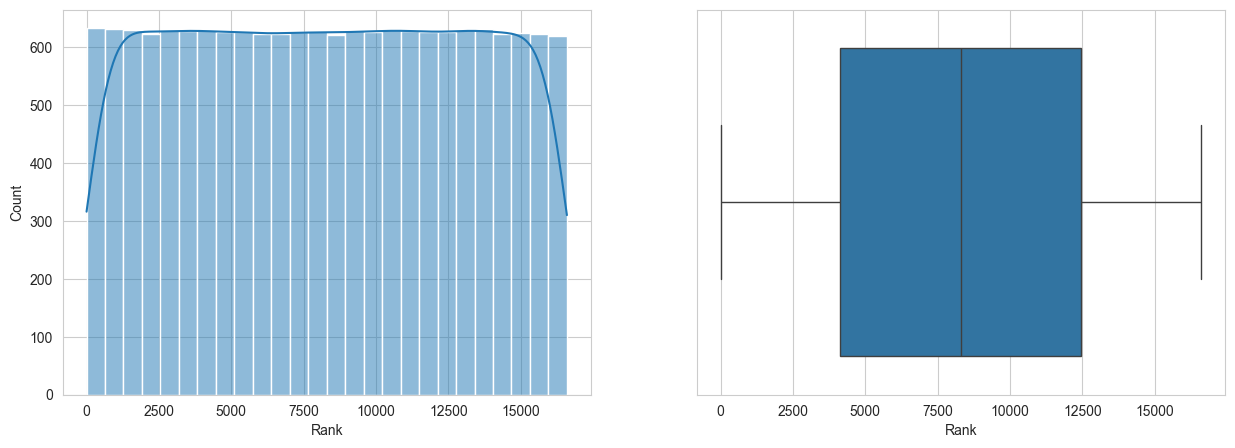

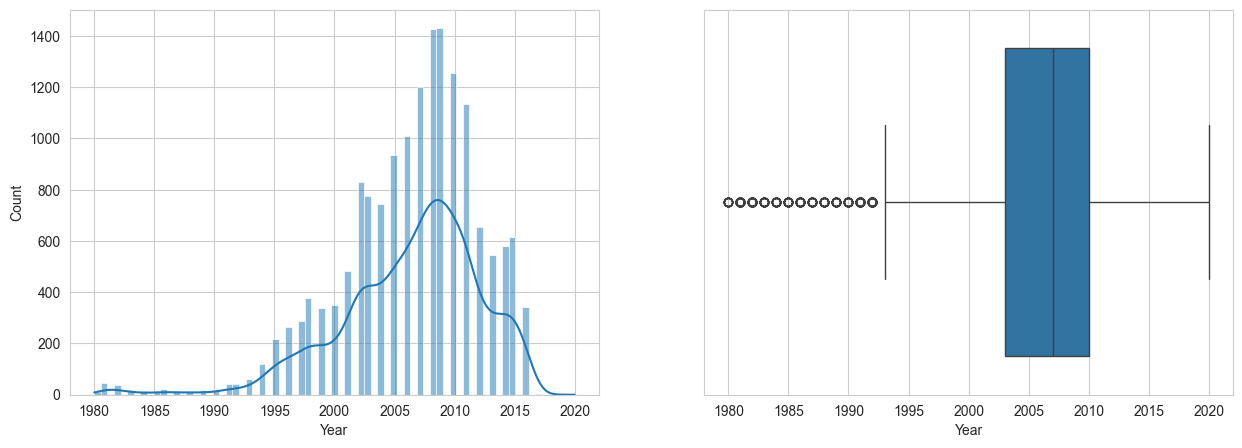

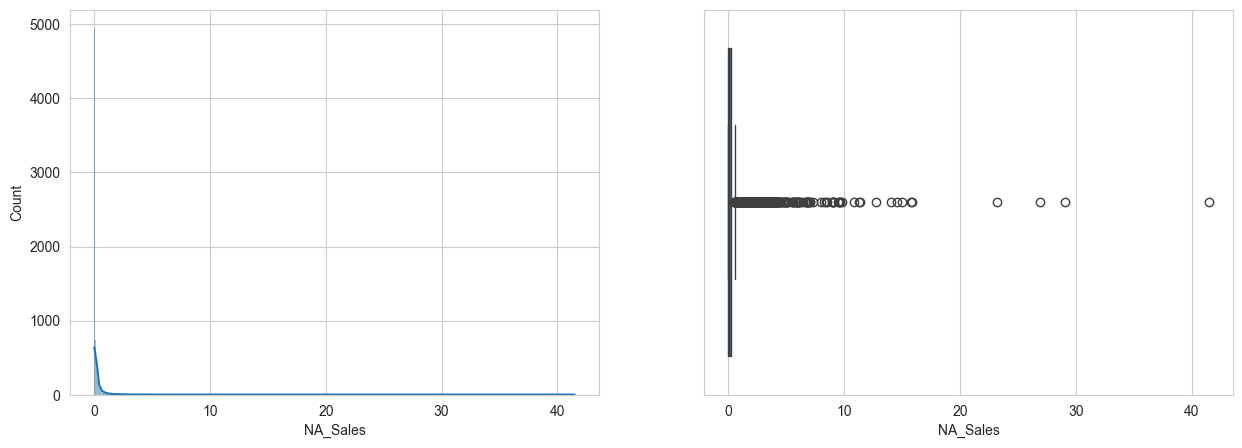

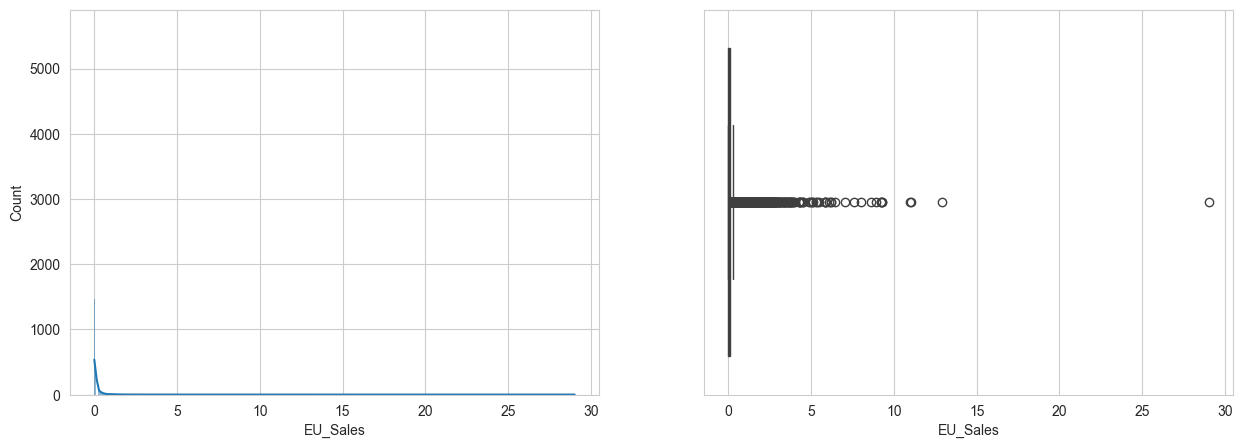

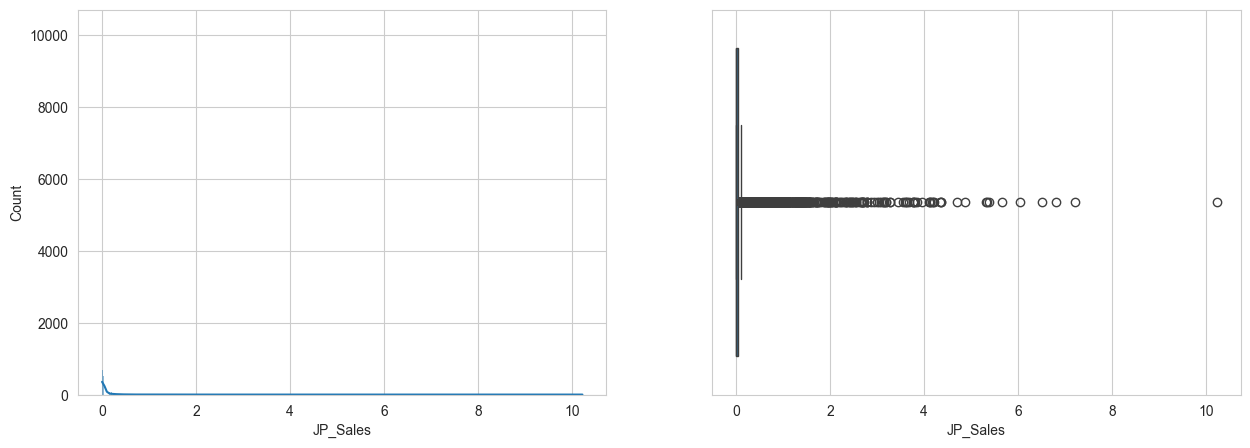

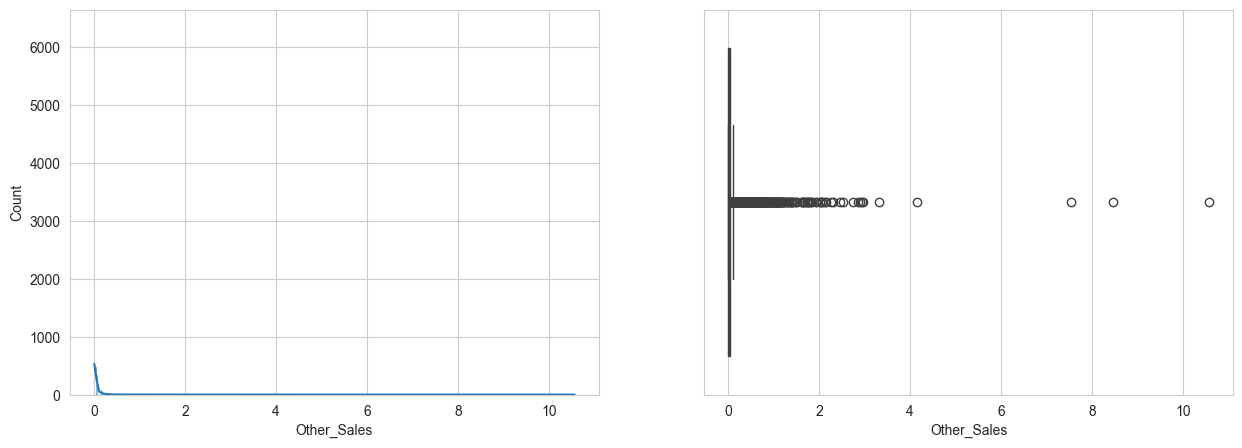

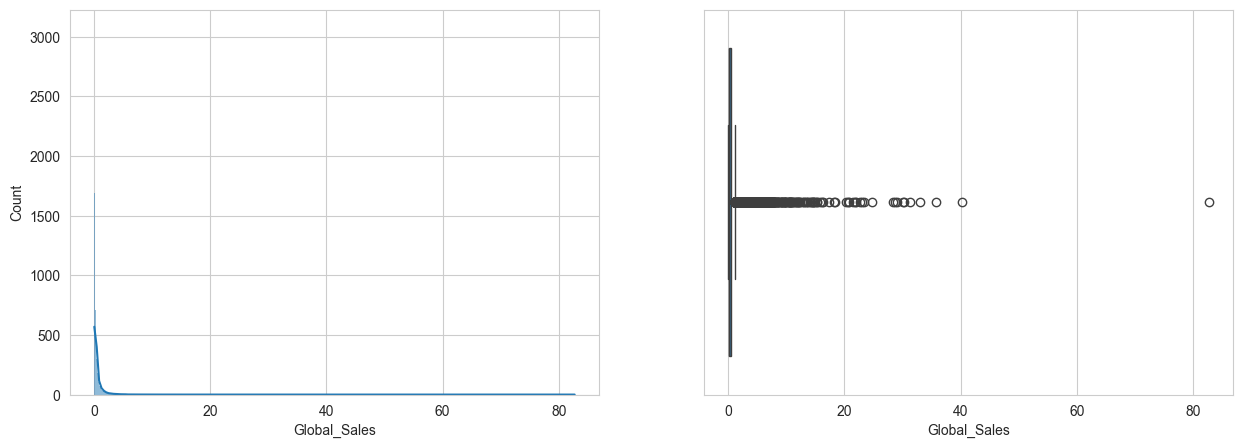

In [15]:
# Plot histograms and boxplots for numerical columns
for col in df.select_dtypes(include='number').columns:
    plot_hist_box(col)

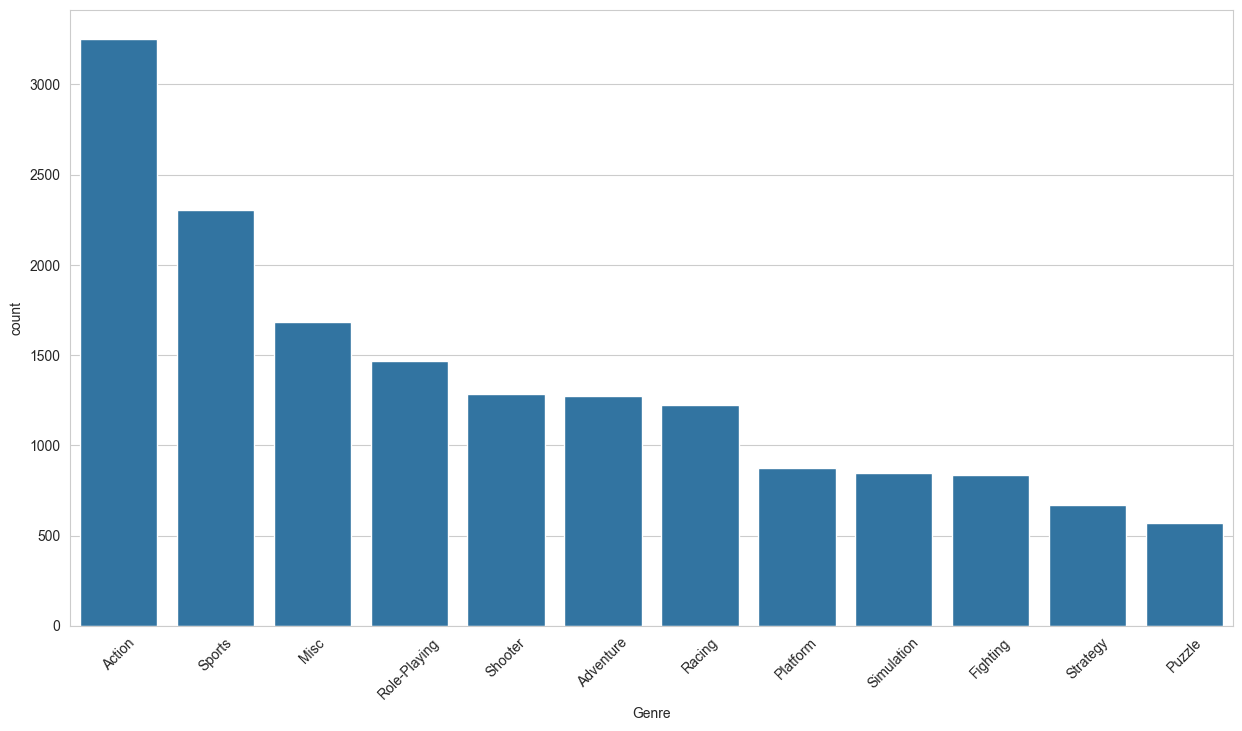

In [16]:
# Challenge 1: Investigate and visualize the distribution of video game genres and teams behind them from 1980 to 2020.
# Plot the distribution of video game genres
plt.figure(figsize=(15, 8))
sns.countplot(x='Genre', data=df, order=df['Genre'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

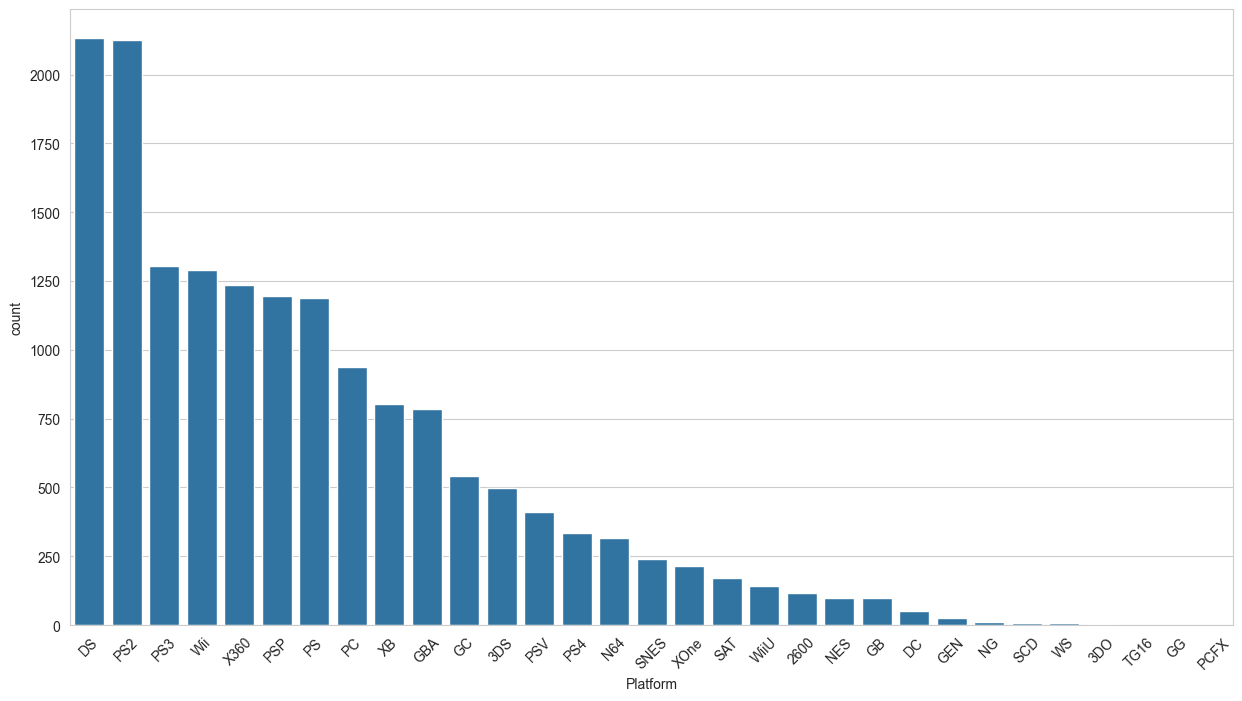

In [17]:
# Plot the distribution of video game platforms
plt.figure(figsize=(15, 8))
sns.countplot(x='Platform', data=df, order=df['Platform'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

## 2.2 Bivariate Analysis

In [18]:
# Challenge 2: Craft the ultimate bar chart
# Visualize the top-selling video games of all time
top_games = df.sort_values('Global_Sales', ascending=False).head(20)
top_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


C:\Users\QKmd\AppData\Local\Temp\ipykernel_21524\3354938587.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=top_games, palette='viridis')


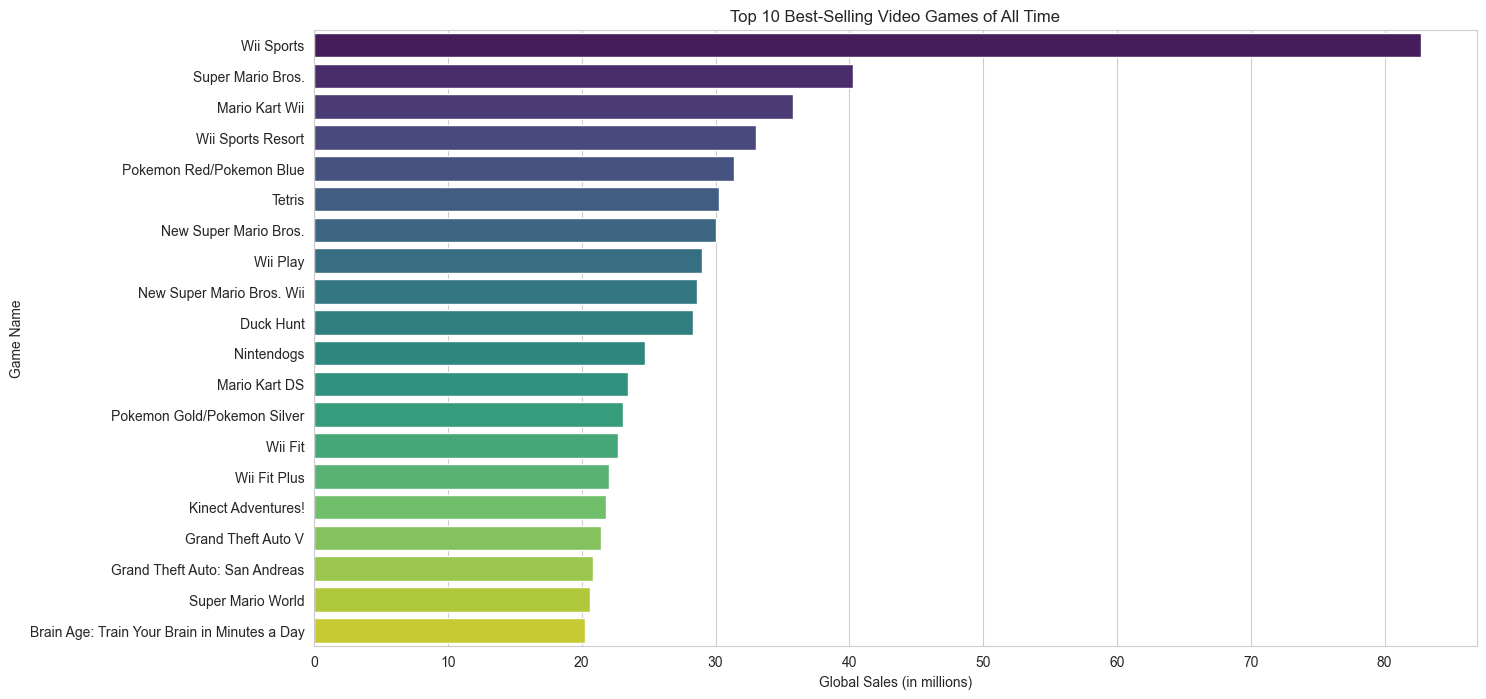

In [19]:
# Plot top 10 games by Global Sales
plt.figure(figsize=(15, 8))
sns.barplot(x='Global_Sales', y='Name', data=top_games, palette='viridis')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Name')
plt.title('Top 10 Best-Selling Video Games of All Time')
plt.show()

<Figure size 2000x800 with 0 Axes>

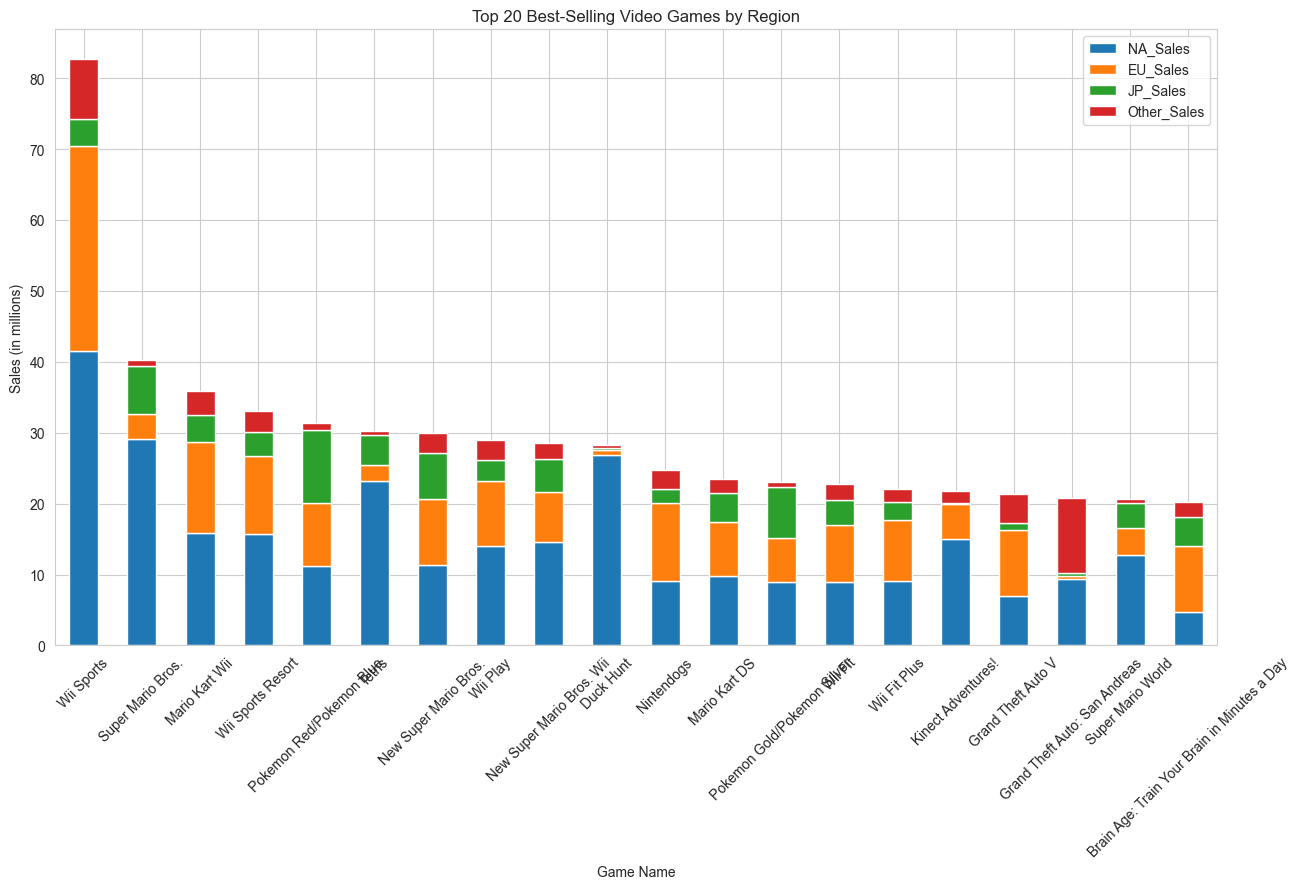

In [20]:
# Visualize the top-selling video games of NA, EU, JP, and Other regions
plt.figure(figsize=(20, 8))
top_games[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].plot(kind='bar', stacked=True, figsize=(15, 8))
plt.xticks(ticks=range(20), labels=top_games['Name'], rotation=45)
plt.xlabel('Game Name')
plt.ylabel('Sales (in millions)')
plt.title('Top 20 Best-Selling Video Games by Region')
plt.show()

C:\Users\QKmd\AppData\Local\Temp\ipykernel_21524\249085225.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Platform', data=top_games, palette='viridis')


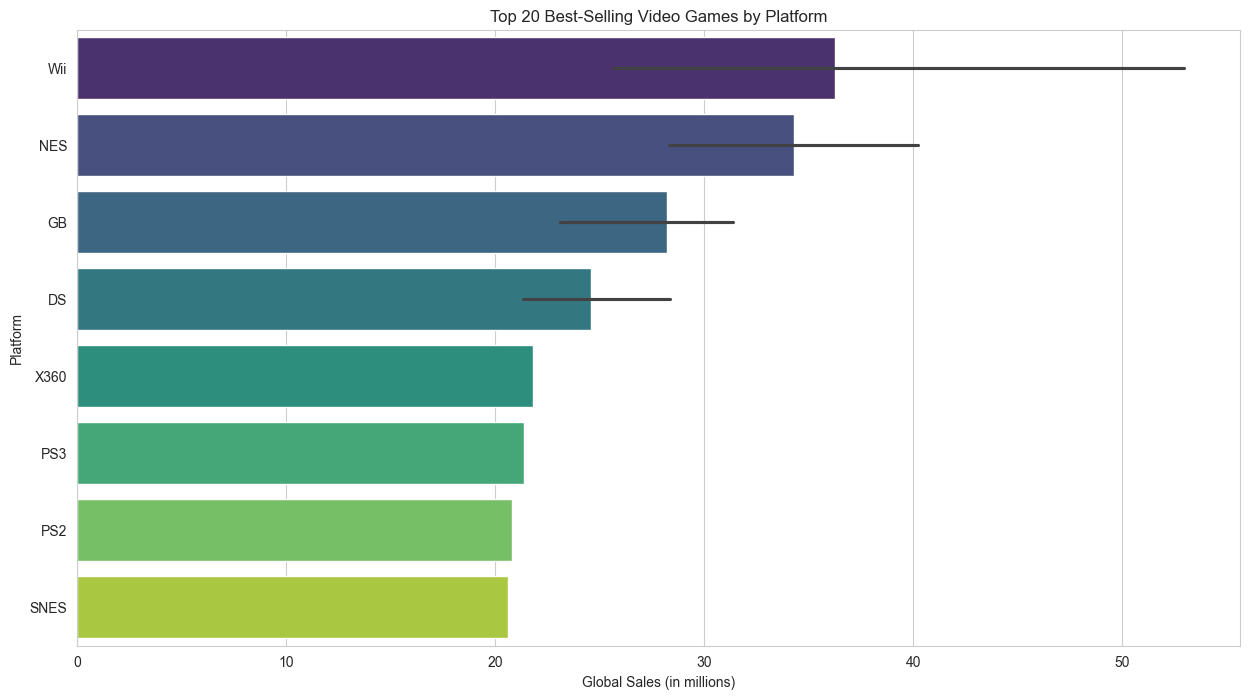

In [21]:
# Visualize the top-selling video games by platform
plt.figure(figsize=(15, 8))
sns.barplot(x='Global_Sales', y='Platform', data=top_games, palette='viridis')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Platform')
plt.title('Top 20 Best-Selling Video Games by Platform')
plt.show()

C:\Users\QKmd\AppData\Local\Temp\ipykernel_21524\4258795238.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Genre', data=top_games, palette='viridis')


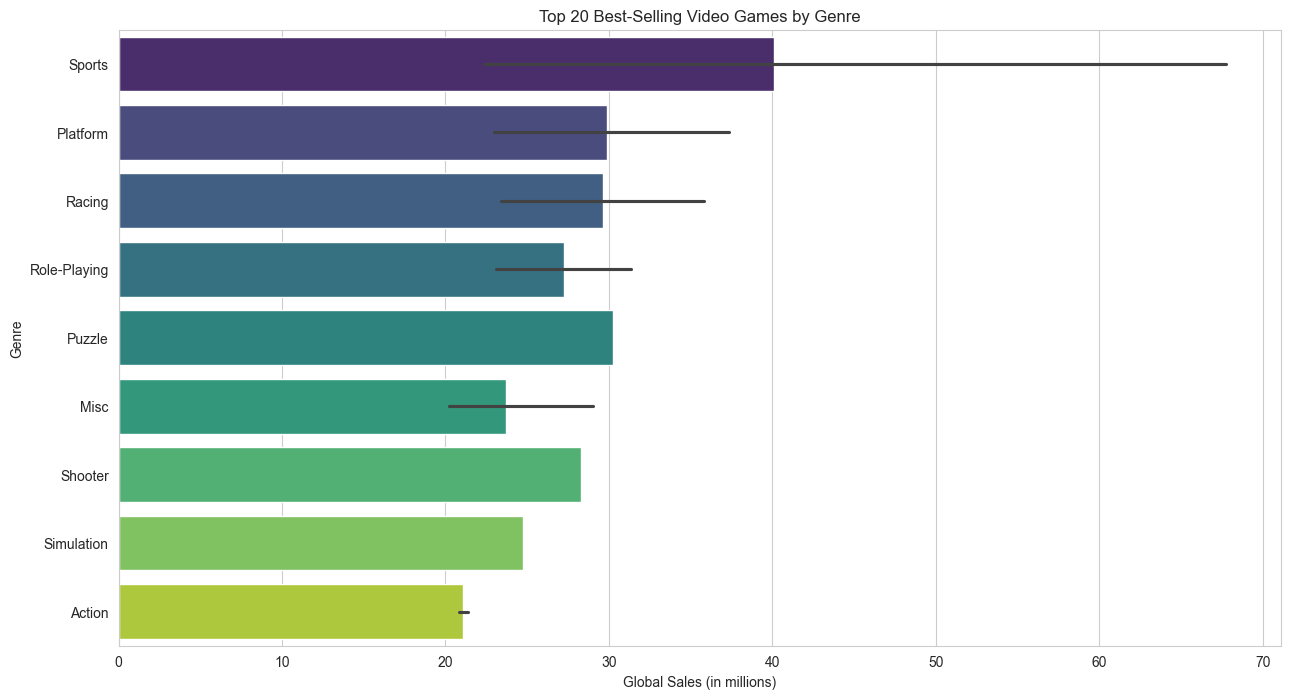

In [22]:
# Visualize the top-selling video games by genre
plt.figure(figsize=(15, 8))
sns.barplot(x='Global_Sales', y='Genre', data=top_games, palette='viridis')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Genre')
plt.title('Top 20 Best-Selling Video Games by Genre')
plt.show()

C:\Users\QKmd\AppData\Local\Temp\ipykernel_21524\2947209.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Publisher', data=top_games, palette='viridis')


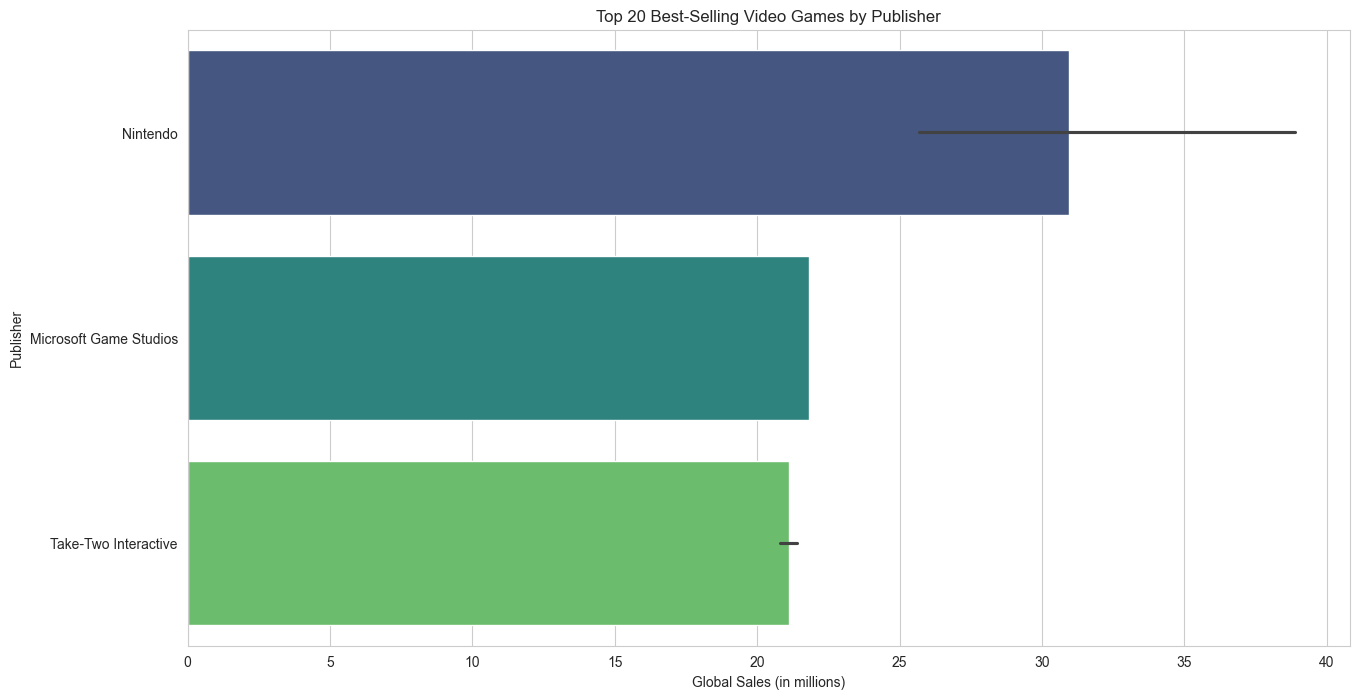

In [23]:
# Visualize the top-selling video games by publisher
plt.figure(figsize=(15, 8))
sns.barplot(x='Global_Sales', y='Publisher', data=top_games, palette='viridis')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Publisher')
plt.title('Top 20 Best-Selling Video Games by Publisher')
plt.show()

In [24]:
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
region_sales.columns = ['Region', 'sum_sales']
region_sales

,Region,sum_sales
0,NA_Sales,4327.65
1,EU_Sales,2406.69
2,JP_Sales,1284.27
3,Other_Sales,788.91


C:\Users\QKmd\AppData\Local\Temp\ipykernel_21524\1898314966.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sum_sales', y='Region', data=region_sales, palette='viridis')


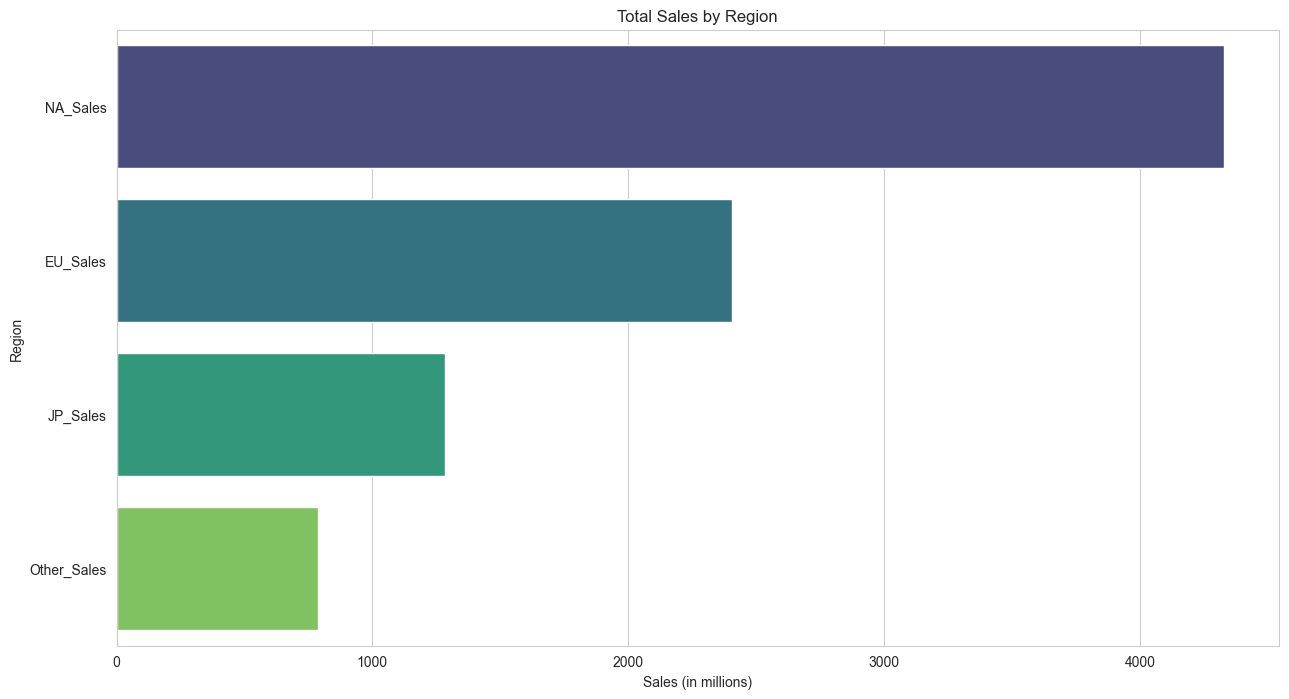

In [25]:
# Visualize each sum region sales
plt.figure(figsize=(15, 8))
sns.barplot(x='sum_sales', y='Region', data=region_sales, palette='viridis')
plt.xlabel('Sales (in millions)')
plt.ylabel('Region')
plt.title('Total Sales by Region')
plt.show()